In [1]:
using LazySets, Plots
#using LazySets.Approximations v

┌ Info: Recompiling stale cache file C:\Users\marce\.julia\compiled\v1.1\LazySets\NjrGc.ji for LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1184


## Default order

In [11]:
Z1 = rand(Zonotope)
Z2 = rand(Zonotope)

order(Z1), order(Z2)

(3//2, 3//2)

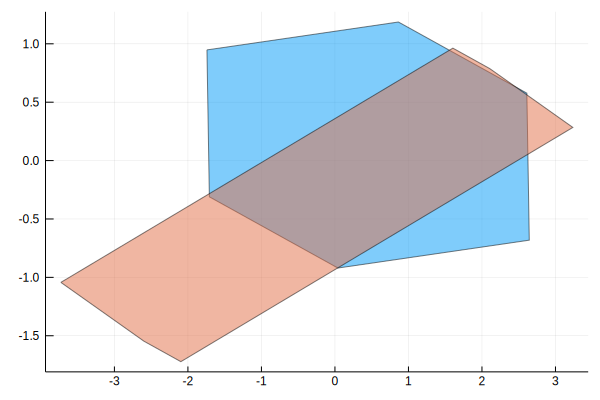

In [12]:
plot(Z1)
plot!(Z2)

In [13]:
ch = ConvexHull(Z1, Z2)

ConvexHull{Float64,Zonotope{Float64},Zonotope{Float64}}(Zonotope{Float64}([0.451318, 0.133275], [-1.30203 -0.0163955 -0.873933; -0.119394 0.629274 0.30481]), Zonotope{Float64}([-0.246106, -0.379592], [0.251245 -2.66623 0.564745; -0.0877476 -1.003 -0.251737]))

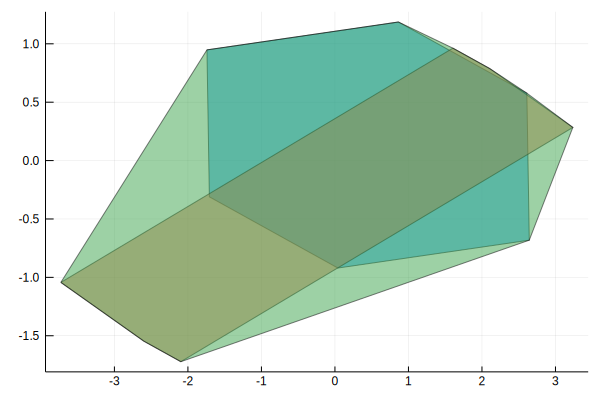

In [14]:
plot!(ch)

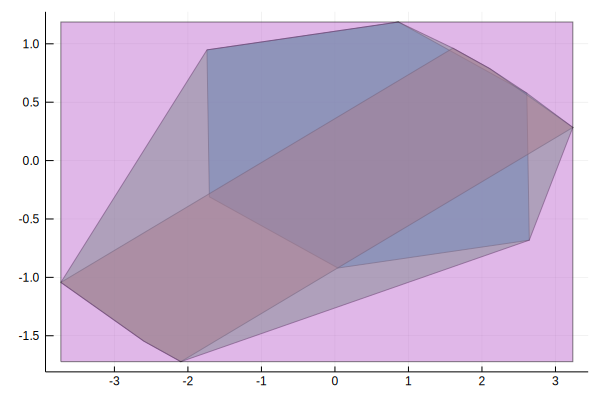

In [15]:
ch_join = overapproximate(ch, Zonotope, algorithm="join")
plot!(ch_join)

In [18]:
ch_join

Zonotope{Float64}([-0.246106, -0.267664], [0.0 -0.0163955 3.46582 0.0; -0.0877476 0.0 0.0 1.36667])

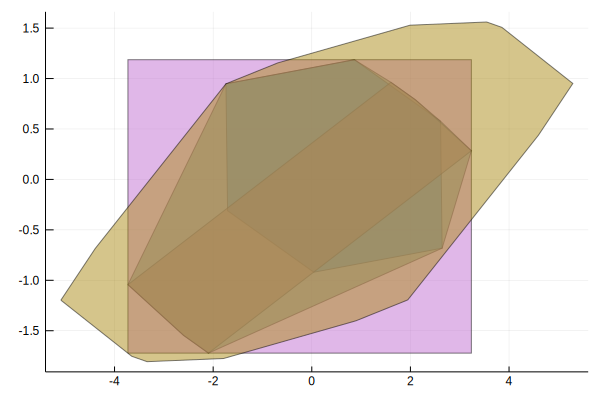

In [16]:
ch_mean = overapproximate(ch, Zonotope, algorithm="mean")
plot!(ch_mean)

In [19]:
ch_mean

Zonotope{Float64}([0.102606, -0.123159], [-0.525394 -1.34131 … 1.32492 -0.719339; -0.103571 -0.186865 … 0.816139 0.278274])

In [26]:
ch_poly = overapproximate(ch, HPolygon, 1e-6)
hausdorff_distance(ch_poly, ch_mean, ε=1e-6) # needs CDDLib

AssertionError: AssertionError: package 'Polyhedra' not loaded (it is required for executing `minkowski_sum`)

In [ ]:
hausdorff_distance(ch, ch_join, ε=1e-6)

## Higher order

In [27]:
Z1 = rand(Zonotope, num_generators=10)
Z2 = rand(Zonotope, num_generators=10)

order(Z1), order(Z2)

(5//1, 5//1)

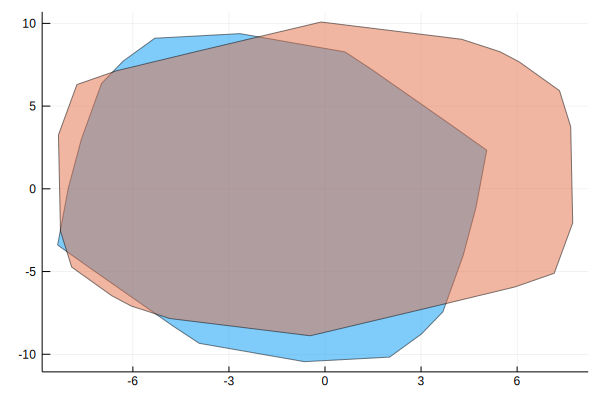

In [28]:
plot(Z1); plot!(Z2)

In [29]:
ch = ConvexHull(Z1, Z2)

ConvexHull{Float64,Zonotope{Float64},Zonotope{Float64}}(Zonotope{Float64}([-1.64959, -0.533658], [0.411418 -0.202563 … 0.315875 -1.33052; -0.525459 -1.46848 … 1.695 -0.138242]), Zonotope{Float64}([-0.29383, 0.601013], [-0.60211 0.616596 … -0.625155 0.0313839; 0.379637 0.415583 … 0.865104 -2.90474]))

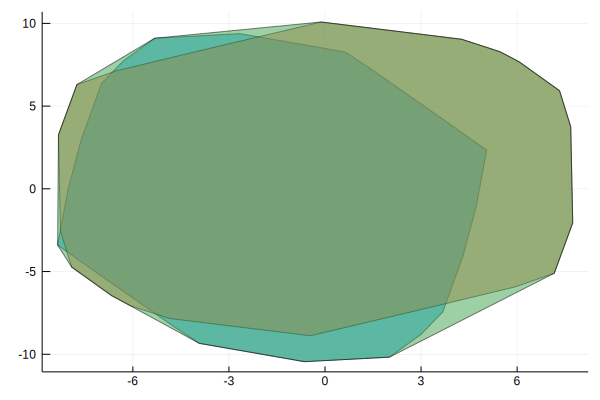

In [30]:
plot!(ch)

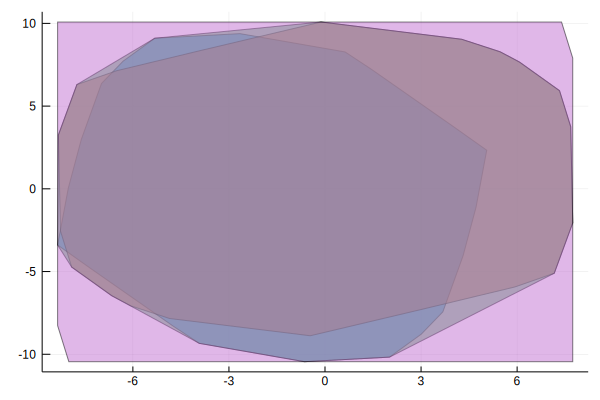

In [31]:
plot!(overapproximate(ch, Zonotope, algorithm="join"))

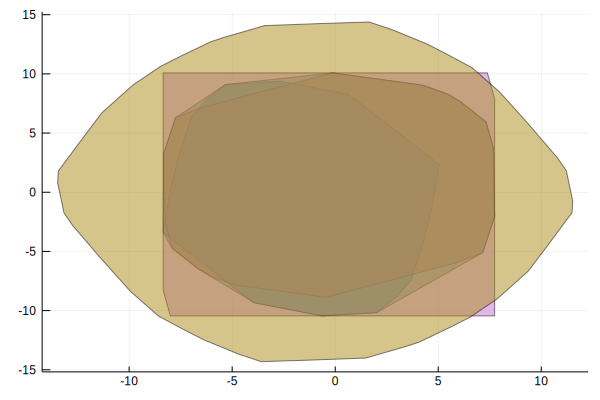

In [32]:
plot!(overapproximate(ch, Zonotope, algorithm="mean"))